In [34]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [63]:
df = pd.read_csv('full_gen_data.csv')

In [64]:
df.head()

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,...,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,slim,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255,0
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255,0
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255,0
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,0
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238,0


## Logistic Regression

In [37]:
X=pd.DataFrame()
X['current_price'] = df['current_price']

In [38]:
X

,current_price
0,3.95
1,3.95
2,3.95
3,3.95
4,3.95
...,...
99995,26.95
99996,26.95
99997,26.95
99998,26.95


In [39]:
y = df['label']

In [40]:
log_mod = LogisticRegression()

In [41]:
log_mod.fit(X,y)

LogisticRegression()

In [42]:
log_mod.coef_

array([[0.01950699]])

##### we can see that the coeffiecient is pretty small , means that as the price increases is hardly the purchase incidence probability increases

In [43]:
df['current_price'].describe()

count    100000.000000
mean         28.290800
std          22.578343
min           1.950000
25%          11.950000
50%          20.950000
75%          37.950000
max         195.950000
Name: current_price, dtype: float64

In [44]:
price_range = np.arange(0,205,0.5)

In [45]:
df_price_range = pd.DataFrame(price_range)

In [46]:
df_price_range

,0
0,0.0
1,0.5
2,1.0
3,1.5
4,2.0
...,...
405,202.5
406,203.0
407,203.5
408,204.0


In [47]:
y_prob = log_mod.predict_proba(df_price_range)

C:\Users\muham\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [48]:
y_prob

array([[0.92017724, 0.07982276],
       [0.9194579 , 0.0805421 ],
       [0.91873264, 0.08126736],
       [0.91800143, 0.08199857],
       [0.91726424, 0.08273576],
       [0.91652102, 0.08347898],
       [0.91577174, 0.08422826],
       [0.91501636, 0.08498364],
       [0.91425484, 0.08574516],
       [0.91348714, 0.08651286],
       [0.91271322, 0.08728678],
       [0.91193305, 0.08806695],
       [0.91114658, 0.08885342],
       [0.91035378, 0.08964622],
       [0.9095546 , 0.0904454 ],
       [0.90874902, 0.09125098],
       [0.90793699, 0.09206301],
       [0.90711847, 0.09288153],
       [0.90629342, 0.09370658],
       [0.90546181, 0.09453819],
       [0.9046236 , 0.0953764 ],
       [0.90377874, 0.09622126],
       [0.90292721, 0.09707279],
       [0.90206895, 0.09793105],
       [0.90120393, 0.09879607],
       [0.90033212, 0.09966788],
       [0.89945348, 0.10054652],
       [0.89856796, 0.10143204],
       [0.89767553, 0.10232447],
       [0.89677615, 0.10322385],
       [0.

In [49]:
purchase_prob = y_prob[:,1]

In [50]:
pe = log_mod.coef_[:,0] * price_range * (1-purchase_prob)

In [51]:
df_price_elasticities = pd.DataFrame(price_range)
df_price_elasticities = df_price_elasticities.rename(columns={0:'Price_point'})
df_price_elasticities['Mean_pe'] = pe
df_price_elasticities

,Price_point,Mean_pe
0,0.0,0.000000
1,0.5,0.008968
2,1.0,0.017922
3,1.5,0.026861
4,2.0,0.035786
...,...,...
405,202.5,0.717431
406,203.0,0.713479
407,203.5,0.709535
408,204.0,0.705599


In [52]:
# pd.options.display.max_rows = None

In [53]:
df_price_elasticities

,Price_point,Mean_pe
0,0.0,0.000000
1,0.5,0.008968
2,1.0,0.017922
3,1.5,0.026861
4,2.0,0.035786
5,2.5,0.044696
6,3.0,0.053592
7,3.5,0.062472
8,4.0,0.071337
9,4.5,0.080187


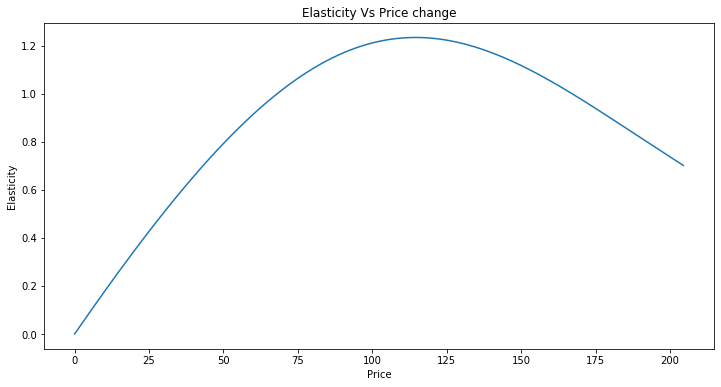

In [54]:
# plotting elasticity against price
plt.figure(figsize=(12,6))
plt.plot(price_range,pe)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Elasticity Vs Price change');

###### This chart shows that clients are inelastic to price, maybe more sensitive to Promotion than price 